In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['axes.titlesize'] = 16
sns.set_theme()

In [ ]:
# downloading the dataset from google drive
!gdown 1Mf1pFzmJYOfpAPTdJyyU5tg6OkEujL0Y

Downloading...
From: https://drive.google.com/uc?id=1Mf1pFzmJYOfpAPTdJyyU5tg6OkEujL0Y
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 10.2MB/s]


In [ ]:
!ls

aerofit_treadmill.csv  sample_data


## Dataset

### The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

* **Product Purchased:**	KP281, KP481, or KP781
* **Age:**	In years
* **Gender:**	Male/Female
* Education:	In years
* **MaritalStatus:**	Single or partnered
* **Usage:**	The average number of times the customer plans to use the treadmill each week.
* **Income:**	Annual income (in $)
* **Fitness:**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* **Miles:**	The average number of miles the customer expects to walk/run each week

In [ ]:
df= pd.read_csv('aerofit_treadmill.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.shape
# There are 9 columns/features in the dataset that describe the customers who purchased one of three products from Aerofit.

(180, 9)

In [ ]:
df.info()
# There seems to be no missing data from a highlevel count of the data set. We'll check to see if there are unexpected values in the dataset.
# All the data types seem to be correct. Should Fitness be a category or a number? Based on the need we can convert them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include= 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


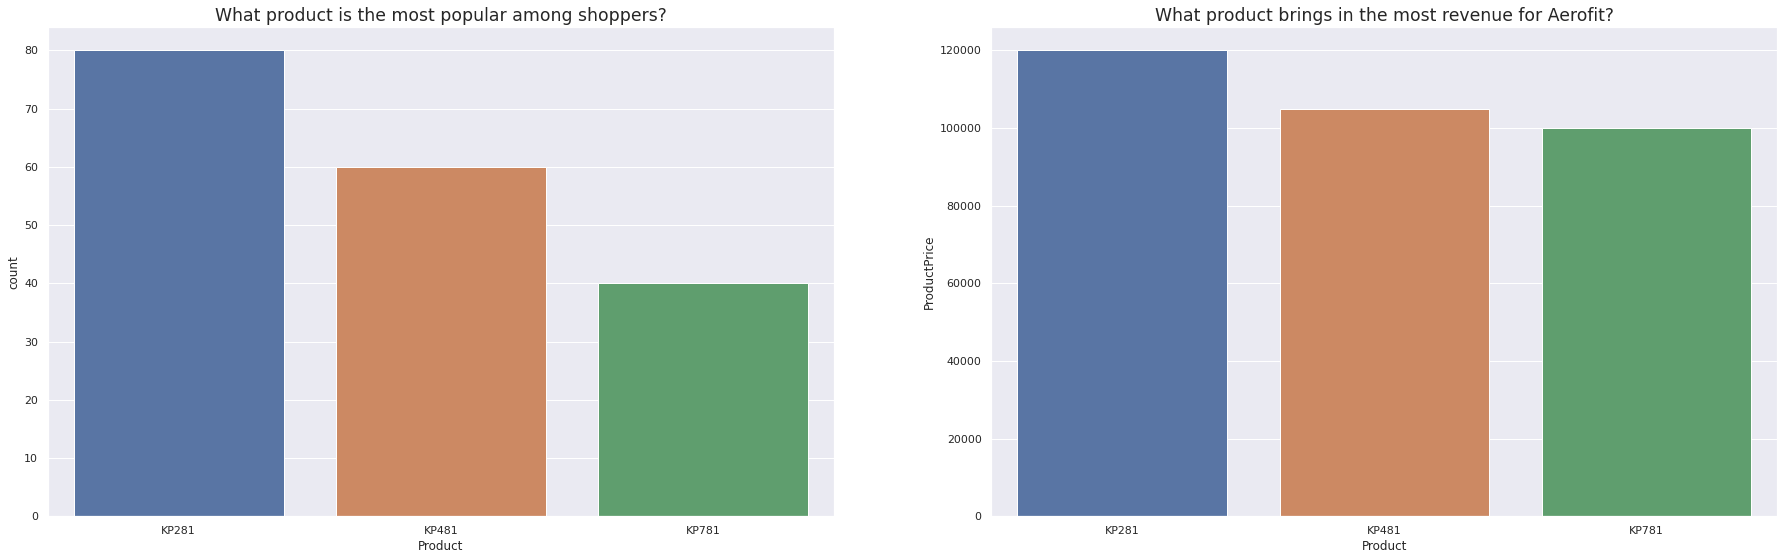

In [ ]:
df['ProductPrice']= df['Product'].map( {
    'KP281': 1500,
    'KP481': 1750,
    'KP781': 2500
} )
_= df.groupby('Product')['ProductPrice'].sum()

### plotting the graphs

fig, axes= plt.subplots(1, 2, figsize= (31, 9))
sns.countplot(data= df, x= 'Product', ax= axes[0])
sns.barplot(x= _.index, y= _, ax= axes[1])
axes[0].set_title( 'What product is the most popular among shoppers?' ,  size= 'x-large')
axes[1].set_title('What product brings in the most revenue for Aerofit?', size= 'x-large' )
plt.show()


# Based on the data entry-level model is the most popular and sells twice more than the premium model (KP781) and 33.3% more than the mid-tier model (KP481)
# Even though the entry level model outsells the premium and the mid-tier models they generate similar revenue for Aerofit.
# Entry level: 36.92%
# Mid-tier: 32.31%
# Premium: 30.77%

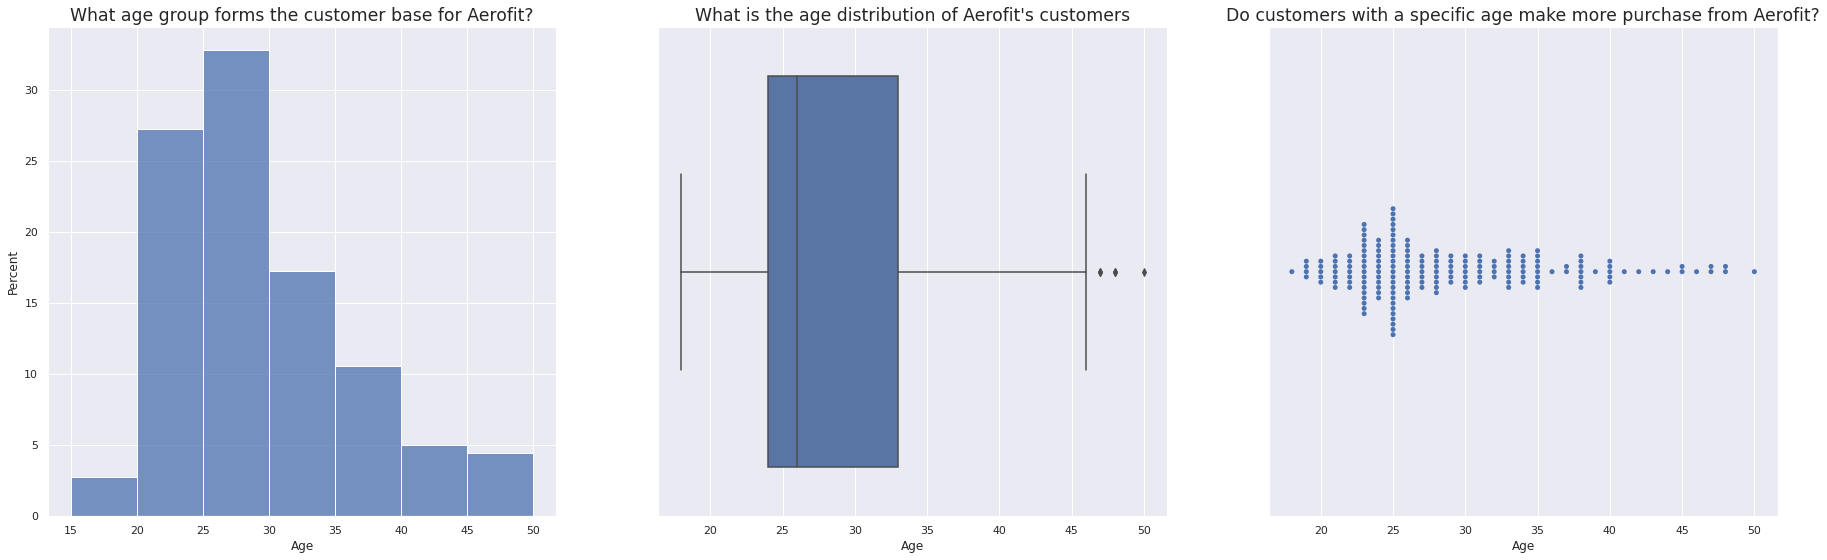

In [ ]:
fig, axes= plt.subplots(1, 3, figsize= (31, 9))

sns.histplot(data= df, x= 'Age', stat= 'percent', bins= np.arange(15, 51, 5), ax= axes[0])
axes[0].set_title('What age group forms the customer base for Aerofit?', size= 'x-large')
sns.boxplot(x= df['Age'], ax= axes[1])
axes[1].set_title('What is the age distribution of Aerofit\'s customers' , size= 'x-large')
sns.swarmplot(x= df['Age'], ax= axes[2])
axes[2].set_title('Do customers with a specific age make more purchase from Aerofit?' , size= 'x-large')
plt.show()

# Looking at the age distribution. Aerofit sells more than 50% of their products to customer between the age of 20 and 30.

# from the box plot looks like 50% of Aerofit's customers are between 18 and 26 and the other 50% are between 27 and 50
# the lower 50% of the customers have a range of 8 while the rest of 50% of customers have a range of 23. This is a bigger customer segment. Could be useful for the marketing team to create targeted marketing outreach.

# based on the swarmplot below we can solidfy our observation that customers from 23 to 26 make up the biggest customer segement for Aerofit.

# There seems to be outlier values with ages above 47.

In [ ]:
_.divide(_.sum())

Gender
Female    0.394615
Male      0.605385
Name: ProductPrice, dtype: float64

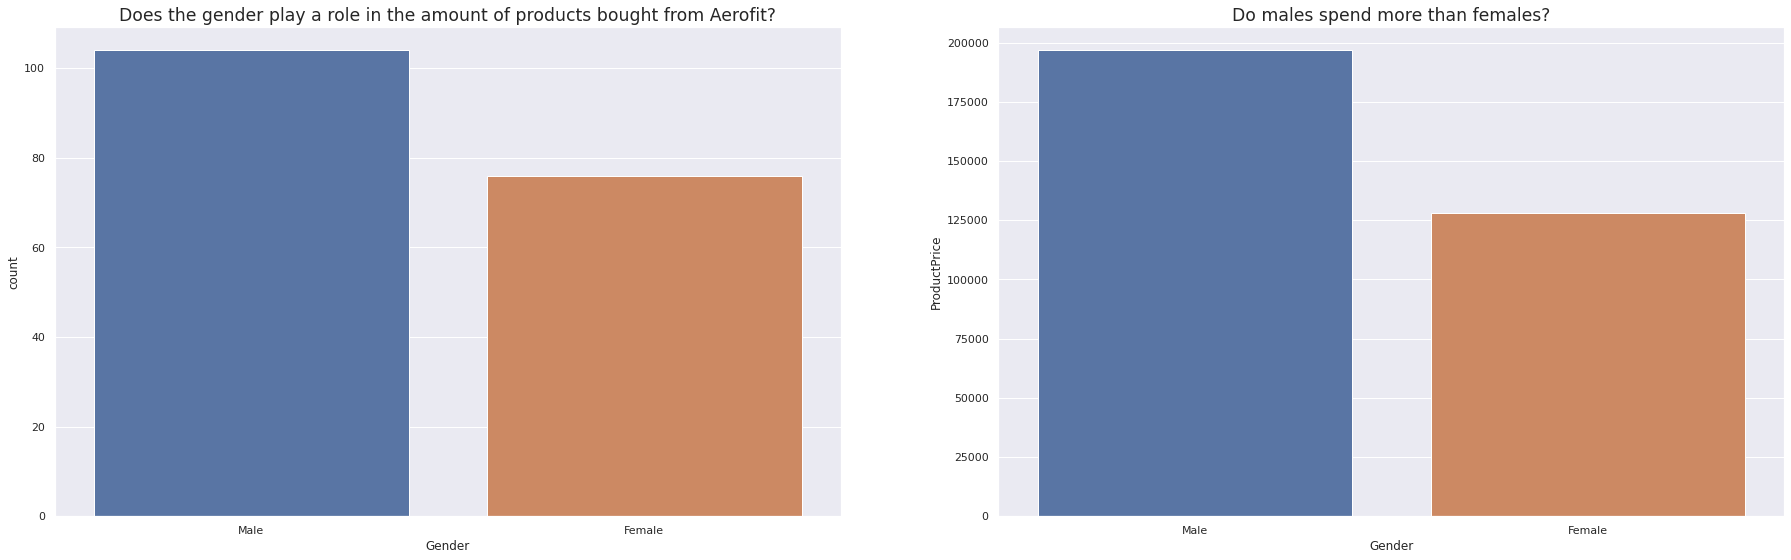

In [ ]:
_= df.groupby('Gender')['ProductPrice'].sum()

fig, axes= plt.subplots(1, 2, figsize= (31, 9))
sns.countplot(x= df['Gender'], ax= axes[0], order= ['Male', 'Female'])
axes[0].set_title('Does the gender play a role in the amount of products bought from Aerofit?', size= 'x-large')
sns.barplot(x= _.index, y= _, ax= axes[1], order= ['Male', 'Female'])
axes[1].set_title('Do males spend more than females?', size= 'x-large')

plt.show()

# Male and female customer make up 58% (104) and 42% (76) of Aerofit's customers respectively.
# And revenue are somewhat similar with males and females contributing 60% and 40% of Aerofit's revenue

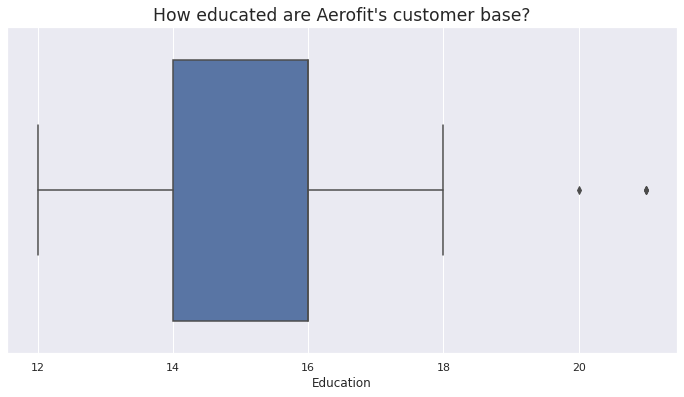

In [ ]:
sns.boxplot(data= df, x= 'Education')
plt.title('How educated are Aerofit\'s customer base?', size= 'x-large')
plt.show()

# Looks like Aerofits' customers are mostly educated between 14 and 16 years.
# Potential outlier values are users with 20 or more years of education.

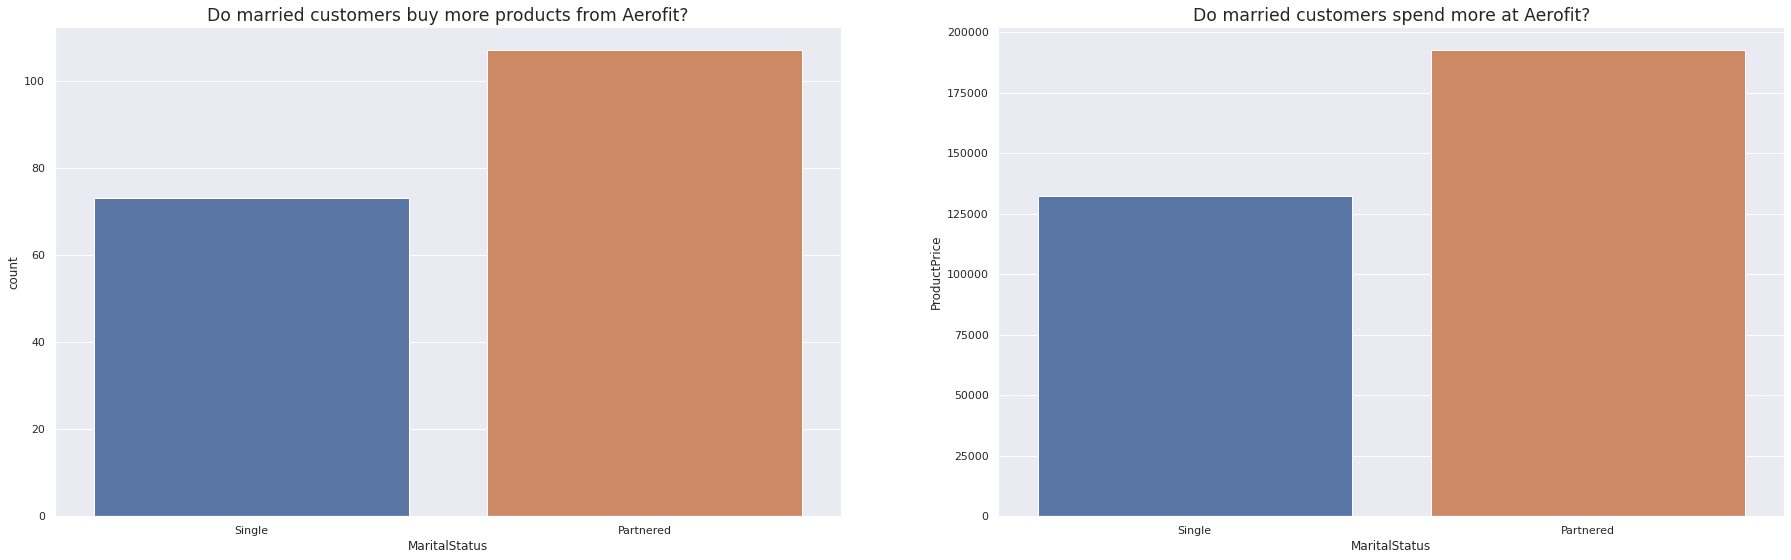

In [ ]:
_= df.groupby('MaritalStatus')['ProductPrice'].sum()

fig, axes= plt.subplots(1, 2, figsize= (31, 9))
sns.countplot(x= df['MaritalStatus'], ax= axes[0], order= ['Single', 'Partnered'])
axes[0].set_title('Do married customers buy more products from Aerofit?', size= 'x-large')
sns.barplot(x= _.index, y= _, ax= axes[1], order= ['Single', 'Partnered'])
axes[1].set_title('Do married customers spend more at Aerofit?', size= 'x-large')

plt.show()

# based on the visualizations below it seems that married customers form both a higher customers base and tend to spend more at Aerofit.
# Is revenue higher for married customers because more married customers buy products from Aerofit or because they buy more premium products from Aerofit?

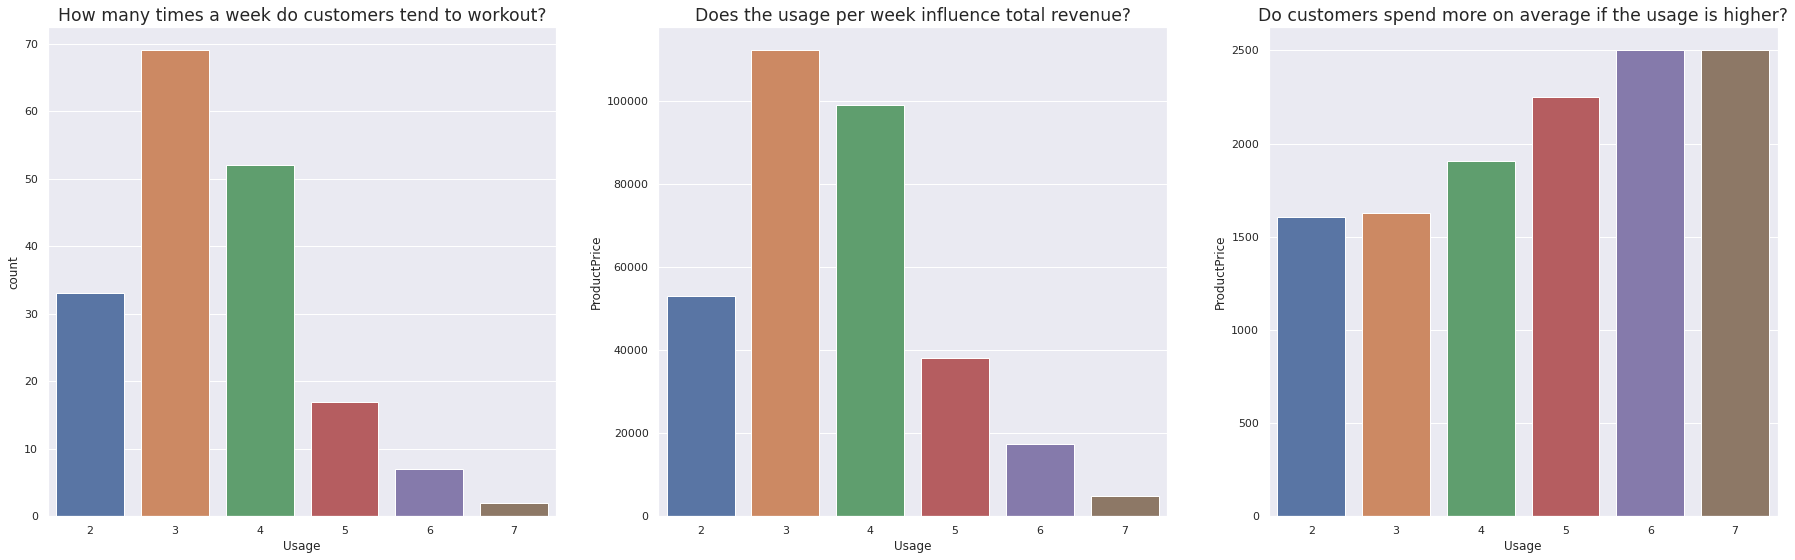

In [ ]:
sum_= df.groupby('Usage')['ProductPrice'].sum()
avg_= df.groupby('Usage')['ProductPrice'].mean()

fig, axes= plt.subplots(1, 3, figsize= (31, 9))
sns.countplot(x= df['Usage'], ax= axes[0])
axes[0].set_title('How many times a week do customers tend to workout?', size= 'x-large')
sns.barplot(x= sum_.index, y= sum_, ax= axes[1])
axes[1].set_title('Does the usage per week influence total revenue?', size= 'x-large')
sns.barplot(x= avg_.index, y= avg_, ax= axes[2])
axes[2].set_title('Do customers spend more on average if the usage is higher?', size= 'x-large')

plt.show()

# It seems like more customers intend to use the product between 2 to 4 days a week and see that the total revenue is more for this group of customers.
# We can also see that customers who intend to use the product more in a week spend more on average at Aerofit. This could be because that very few customers do form this category and is skewing the data.

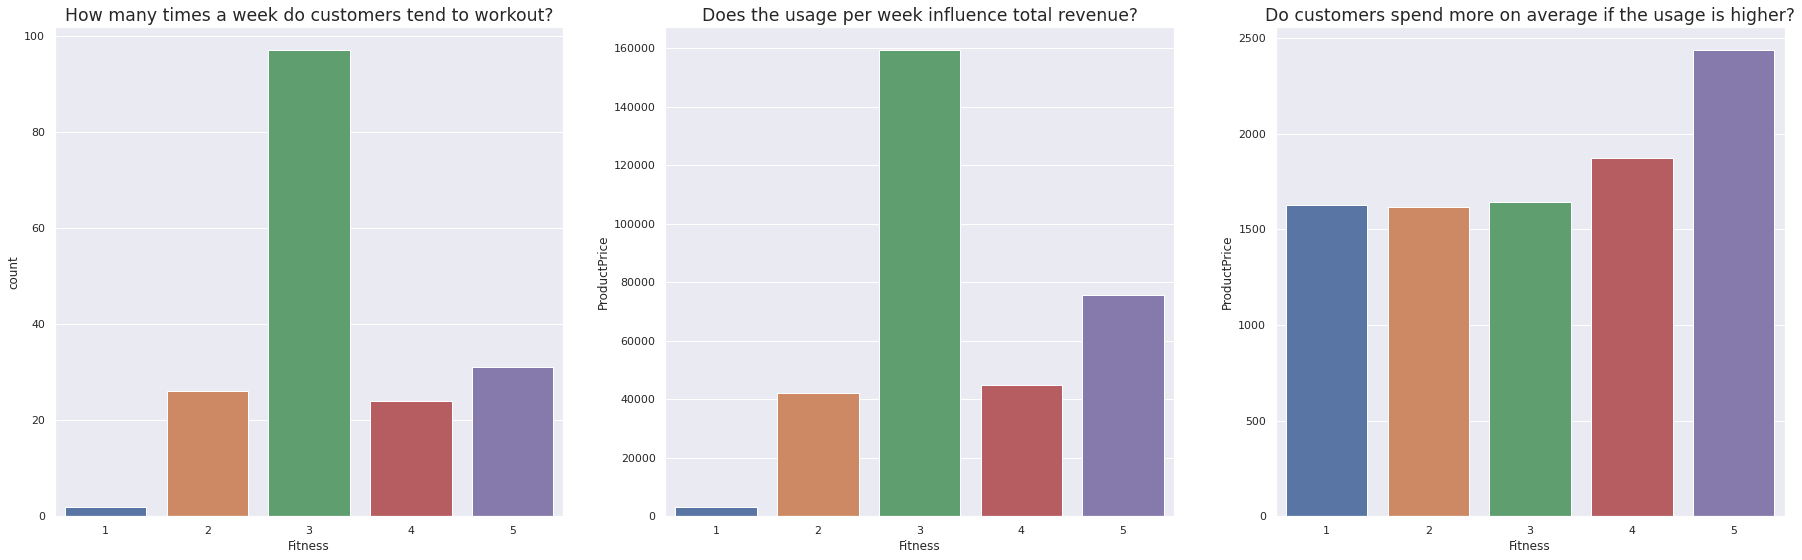

In [ ]:
sum_= df.groupby('Fitness')['ProductPrice'].sum()
avg_= df.groupby('Fitness')['ProductPrice'].mean()

fig, axes= plt.subplots(1, 3, figsize= (31, 9))
sns.countplot(x= df['Fitness'], ax= axes[0])
axes[0].set_title('How many times a week do customers tend to workout?', size= 'x-large')
sns.barplot(x= sum_.index, y= sum_, ax= axes[1])
axes[1].set_title('Does the usage per week influence total revenue?', size= 'x-large')
sns.barplot(x= avg_.index, y= avg_, ax= axes[2])
axes[2].set_title('Do customers spend more on average if the usage is higher?', size= 'x-large')

plt.show()

# It seems like most customers rate themselves average (3) on a scale of 1-to-5 and make up the biggest customer base and revenue generators for Aerofit.
# On checking the average amount spent at Aerofit, customers rating themselves 1-to-3 spent similar amounts on average and customers rating themselves 4 or 5 spent more on average.

In [ ]:
(np.percentile(df['Miles'], 75) - np.percentile(df['Miles'], 25)) * 1.5 + np.percentile(df['Miles'], 75)

187.875

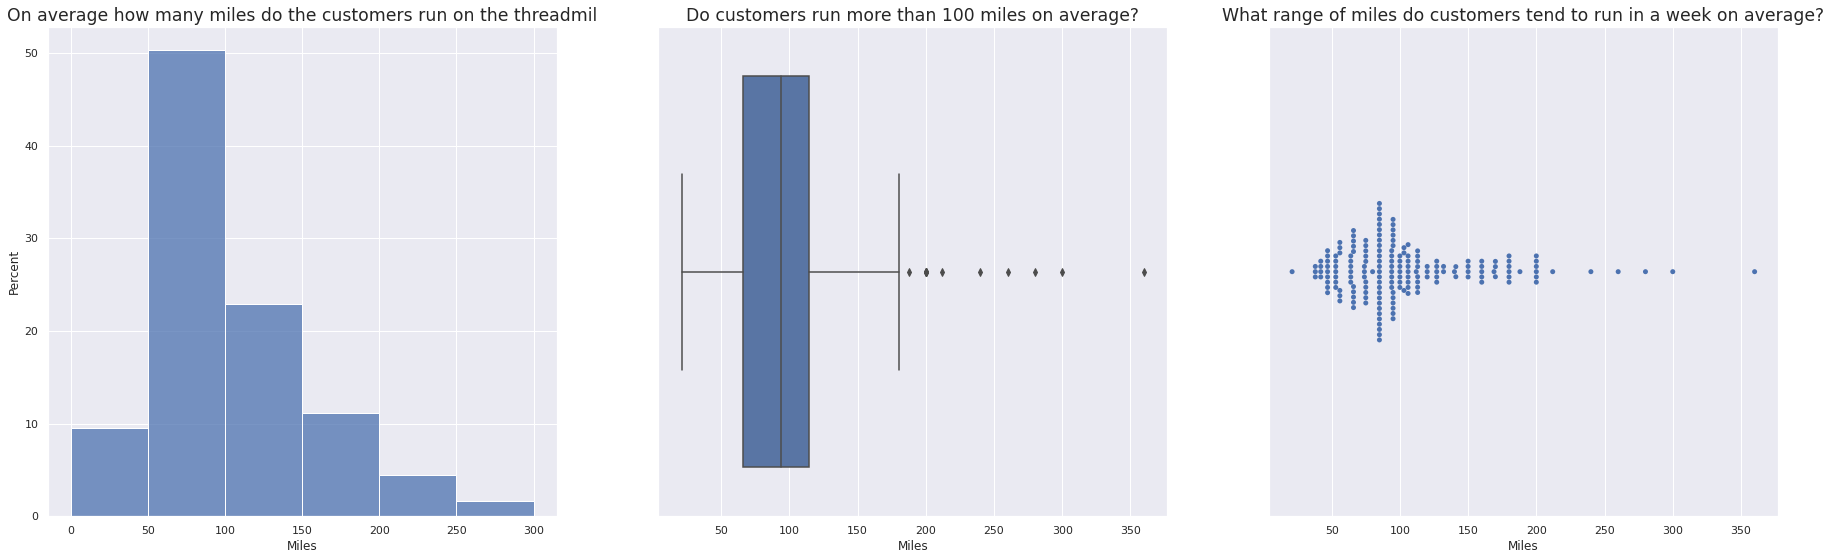

In [ ]:
fig, axes= plt.subplots(1, 3, figsize= (31, 9))

sns.histplot(data= df, x= 'Miles', stat= 'percent', bins= np.arange(0, 350, 50), ax= axes[0])
axes[0].set_title('On average how many miles do the customers run on the threadmil', size= 'x-large')
sns.boxplot(x= df['Miles'], ax= axes[1])
axes[1].set_title('Do customers run more than 100 miles on average?' , size= 'x-large')
sns.swarmplot(x= df['Miles'], ax= axes[2])
axes[2].set_title('What range of miles do customers tend to run in a week on average?' , size= 'x-large')
plt.show()

# Most customers intend to run between 50 and 100 miles a week
# There seem to be some potential outliers. Beyond 180 miles.

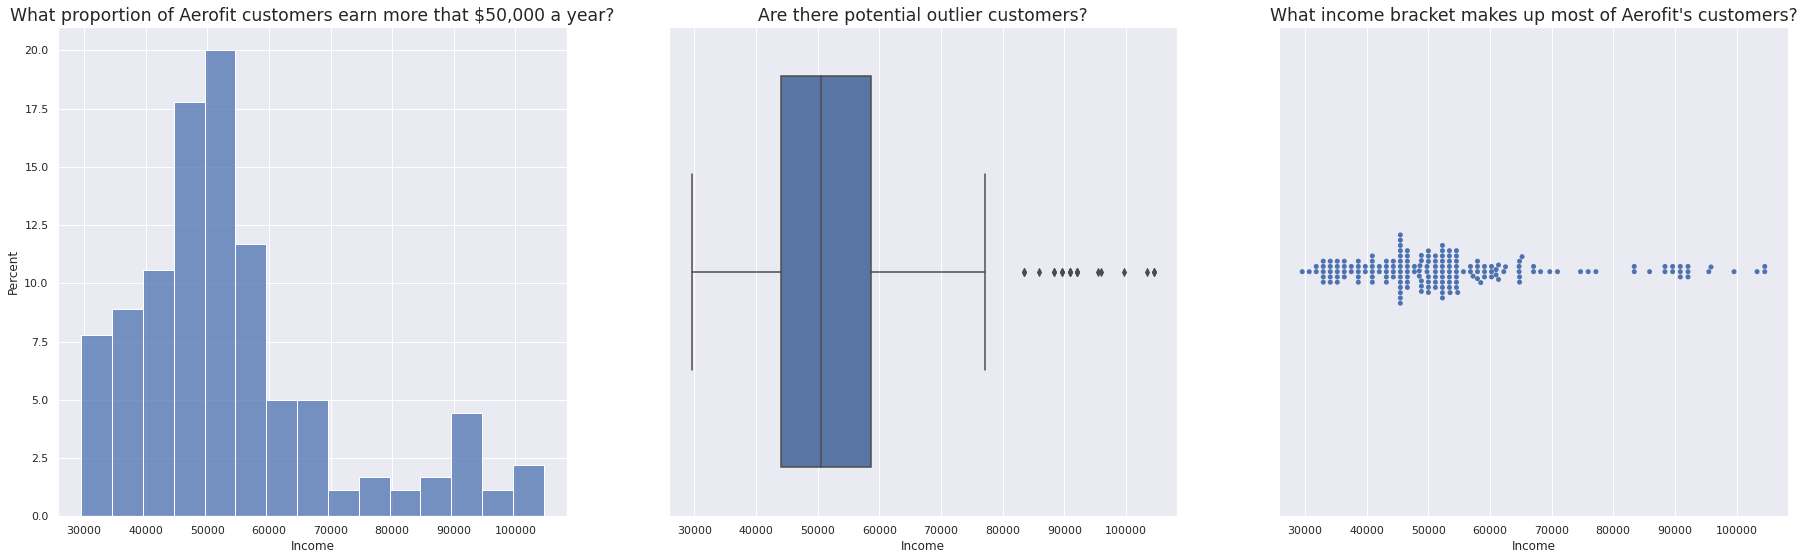

In [ ]:
fig, axes= plt.subplots(1, 3, figsize= (31, 9))

sns.histplot(data= df, x= 'Income', stat= 'percent', ax= axes[0])
axes[0].set_title('What proportion of Aerofit customers earn more that $50,000 a year?', size= 'x-large')
sns.boxplot(x= df['Income'], ax= axes[1])
axes[1].set_title('Are there potential outlier customers?' , size= 'x-large')
sns.swarmplot(x= df['Income'], ax= axes[2])
axes[2].set_title('What income bracket makes up most of Aerofit\'s customers?' , size= 'x-large')
plt.show()

# 50% of Aerofit's customers earn below $50,000 in a year
# There seem to be some potential outliers. Beyond 180 miles.

### What's the probability for each of the product being purchased by a customer?

In [ ]:
df['Product'].value_counts(normalize= True).mul(100).round(2)

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

## 1). What's the probability that the next customer would be aged between 20 - 30?
## 2). What's the probability that the customer would be aged between 20 - 30 given that they purchased the premium model KP781?
## 3). What's the probability that the customer bought a KP281 given that they are aged 20 - 30?
## 4). What's the probability that a customer is aged between 20-30 and they bought a KP281 entry level machine?

In [ ]:
pd.cut(df['Age'], bins= np.arange(10, 60, 10)).value_counts(normalize= True).mul(100).round(2)
# There's a ~ 61% percent chance that the next customer would be between 20 and 30.

(20, 30]    61.11
(30, 40]    26.67
(40, 50]     6.67
(10, 20]     5.56
Name: Age, dtype: float64

In [ ]:
pd.crosstab(index= df['Product'], columns= pd.cut(df['Age'], bins= np.arange(10, 60, 10)))
# There's 75% chance that the a customer is aged between 20-30 given that they purchased a premium model.
# There's a 49% chance that the customer bought a KP281 given that the customer is aged between 20 - 30.
# There's a 27.2% chance that a customer is aged between 20-30 and they bought a KP281.

Age,"(10, 20]","(20, 30]","(30, 40]","(40, 50]"
Product,,,,
KP281,6,49,19,6
KP481,4,31,23,2
KP781,0,30,6,4


## 1). What's the probability that the next customer would be female?
## 2). What's the probability that the customer would be a female customer given that they purchased the premium model KP781?
## 3). What's the probability that the customer bought a KP281 given that it's a male customer?
## 4). What's the probability that a customer is female and they bought a KP481 mid-tier level machine?

In [ ]:
df['Gender'].value_counts(normalize= True).mul(100).round(2)
# There's a ~42% chance that a product from Aerofit would be purchased by a female customer

Male      57.78
Female    42.22
Name: Gender, dtype: float64

In [ ]:
pd.crosstab(index= df['Product'], columns= df['Gender'])
# There's a 17.5% chance that the customer would be female given that they bought the premium model.
# There's a 30.4% chance that the customer would have bought a KP281 given that it was a male cusotmer.
# There's a 16.1% chance that a customer is female and they bought a KP481 mid-tier model.

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


## 1). What's the probability that the next customer would have education between 15 - 20 years?
## 2). What's the probability that the customer would have bought a premium model (KP 781) given that they are educated for more than 20 years?
## 3). What's the probability that the customer bought a KP281 given that they were educated less than 15 years?
## 4). What's the probability that a customer is educated above 20 years and they bought a KP481 mid-tier level machine?

In [ ]:
pd.cut(df['Education'], bins= np.arange(10, 26, 5)).value_counts(normalize= True).mul(100).round(2)
# There's a 60% chance that the customer would be educated between 15 - 20 years.

(15, 20]    60.56
(10, 15]    37.78
(20, 25]     1.67
Name: Education, dtype: float64

In [ ]:
pd.crosstab(index= df['Product'], columns= pd.cut(df['Education'], bins= np.arange(10, 26, 5)))

# There's a 100% chance that a customer would buy a premium model given that they are educated for more than 20 years.
# There's ~57% chance that the customer bought a KP281 entry level model given they were educated less than 15 years.
# There's 0% chance that the customer was educated above 20 years and bought a KP481

Education,"(10, 15]","(15, 20]","(20, 25]"
Product,,,
KP281,39,41,0
KP481,27,33,0
KP781,2,35,3


## 1). What's the probability that the next customer would earn above \$50000?
## 2). What's the probability that the customer would have bought a premium model (KP 781) given that they earn more than \$50000?
## 3). What's the probability that the customer bought a KP281 given that they earned more than \$50000?
## 4). What's the probability that a customer earns $50000 and buys a mid-tier level treadmill?

In [ ]:
(df['Income'] >= 50000).value_counts(normalize= True).mul(100).round(2)
# There's a ~54% chance that the next customer would make more than $50,000

True     53.89
False    46.11
Name: Income, dtype: float64

In [ ]:
pd.crosstab(df['Product'], columns= df['Income'] >= 50000)

# There's a 87.5% chance that the customer buy the premium  KP781 model given that they earn more than $50,000
# There's a 40% chance that the customer by the entry-level KP281 entry level model given that they earn more than $50,000
# There's a 16.67% chance that the customer earns more than $50,000 and buy the mid-tier machine.

Income,False,True
Product,,
KP281,48,32
KP481,30,30
KP781,5,35


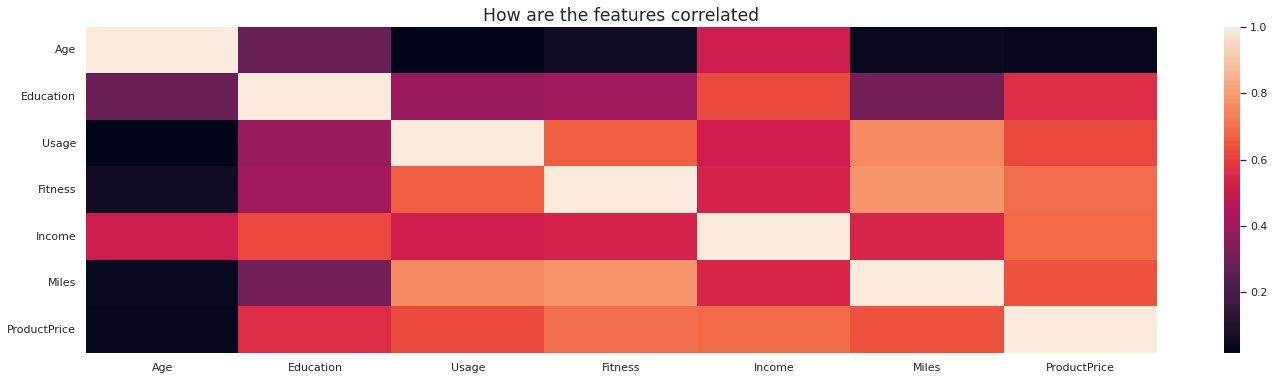

In [ ]:
plt.figure(figsize= (24, 6))
sns.heatmap(df.corr())
plt.title('How are the features correlated', size= 'x-large')
plt.show()

# From the heatmap we see that income and fitness influence Product Price the most.
# Age has the least correlation with Product Price.

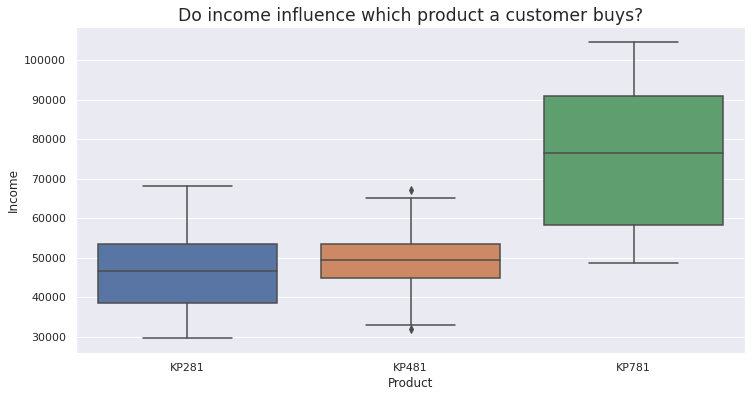

In [ ]:
sns.boxplot(data= df, x= 'Product', y= 'Income')
plt.title('Do income influence which product a customer buys?', size= 'x-large')
plt.show()

# There seems to be some over lap between customer buying the entry level and the mid-tier machine.
# Premium machine is mostly bought by customers with income higher than $50,000

# Recommendations

---

## Ages doesn't seemt to influence the price of the product being sold
## Income level and self rated fitness level seem to influence the price of the product the most. Marketing team shoudl consider segmenting the customer based these criterias first.
## There's a high probability that the customer would be educated more than 15 years. The marketing team should make tech specs that provide more info to informed customers.
## There's a very low probability that a customer with fitness rating less than 3 buy a machine. There should be more focus to help potential customers with lower fitness level to make a buy decision.